### 1. Fashion-MNIST데이터셋 가져오기

In [1]:
# Fashion MNIST 데이터셋 가져오기
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### 2. 탐색적 데이터 분석(EDA)

In [2]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

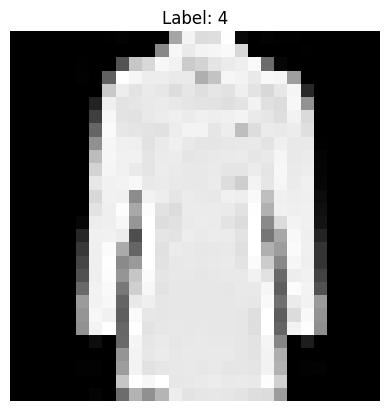

In [3]:
# 난수값을 생성해서 train_images와 train_labels중에 하나를 선택해서 이미지와 레이블을 출력한다.
import numpy as np
import matplotlib.pyplot as plt

index = np.random.randint(len(train_images))
image = train_images[index]
label = train_labels[index]

plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

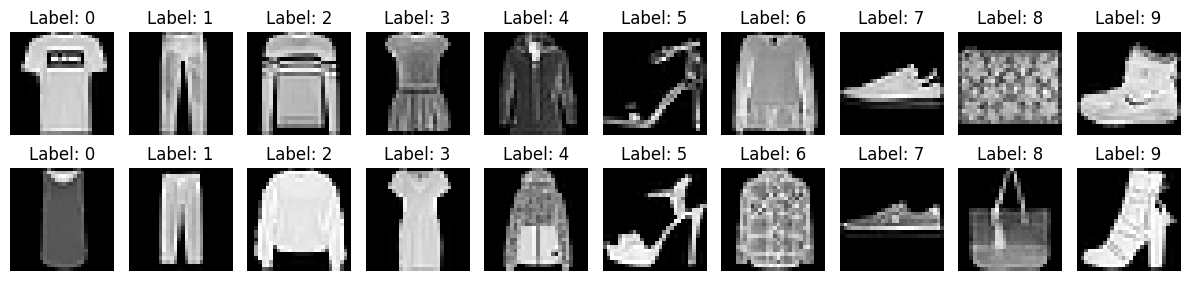

In [ ]:
# train_images와 train_labels중에 클래스별로 2개씩 20개를 선택하여 이미지와 레이블을 출력한다.
# 이미지 출력시 2행 10열로 출력

# train_images와 train_labels중에 클래스별로 2개씩 20개를 선택해서 이미지와 레이블을 출력한다.
# 이미지 출력시 2행 10열로 출력(같은 열에는 같은 클래스를 출력)
import numpy as np
import matplotlib.pyplot as plt

# Get unique labels
unique_labels = np.unique(train_labels);

# Prepare lists to store selected images and labels
selected_images = []
selected_labels = []

# Select 2 images per class
for label in unique_labels:
    # Find indices for the current label
    # np.where가 반환한 튜플의 첫 번째 요소인 인덱스 배열을 추출하기 위한 [0]
    indices = np.where(train_labels == label)[0]
    # Select the first two images (or fewer if not enough are available)
    selected_images.extend(train_images[indices[:2]])
    selected_labels.extend(train_labels[indices[:2]])

# Create a 2x10 grid for plotting
plt.figure(figsize=(12, 3)) # Adjust figure size for better display

for col_idx in range(10): # For each of the 10 classes/columns
    # Plot the first image of the current class in the first row
    img1_index = col_idx * 2
    plt.subplot(2, 10, col_idx + 1) # row 1, col_idx + 1
    plt.imshow(selected_images[img1_index], cmap='gray')
    plt.title(f"Label: {selected_labels[img1_index]}")
    plt.axis('off')

    # Plot the second image of the current class in the second row
    img2_index = col_idx * 2 + 1
    plt.subplot(2, 10, 10 + col_idx + 1) # row 2, col_idx + 1 (10 is for the second row offset)
    plt.imshow(selected_images[img2_index], cmap='gray')
    plt.title(f"Label: {selected_labels[img2_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 3. 데이터 전처리
3.1 정규화(Normalization) 0\~255(unit8) -> 0~1(float) <br>
3.2 레이블을 10진수 -> one-hot encoding <br>
3.3 이미지가 3차원(60000,28,28) -> 2차원(60000, 28*28)

In [5]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [6]:
# train_images와 test_images의 픽셀값을 0~1사이의 float로 Normalize
train_images_norm = train_images.astype('float32') / 255.0
test_images_norm = test_images.astype('float32') / 255.0

In [11]:
train_images_norm[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
        0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215687, 0.53333336, 0.85882354,
        0.84705883, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.8509804 , 0.84313726, 0.99607843,
        0.90588236, 0.627451  , 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.6901961 , 0.87058824, 0.8784314 , 0.83137256,
        0.79607844, 0.7764706 , 0.76862746, 0.78431374, 0.84313726,
        0.8       , 0.7921

In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
# train_labels, test_labels를 one-hot encoding
from keras.utils import to_categorical

train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

In [12]:
train_labels_onehot[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [25]:
train_images_norm.shape, train_images_norm.shape[1], train_images_norm.shape[2]

((60000, 28, 28), 28, 28)

In [14]:
# train_images_norm과 test_images_norm 3차원에서 2차원으로 변환

# 이미지의 사이즈를 배열에서 읽어오기
image_size = train_images_norm.shape[1] * train_images_norm.shape[2]

train_images_2d = train_images_norm.reshape(-1, image_size)
test_images_2d = test_images_norm.reshape(-1, image_size)

print("Train images (flattened) shape:", train_images_2d.shape)
print("Test images (flattened) shape:", test_images_2d.shape)

Train images (flattened) shape: (60000, 784)
Test images (flattened) shape: (10000, 784)


### 4. 훈련용(train) 데이터셋에서 검증용(valid) 데이터셋 분할

In [16]:
from sklearn.model_selection import train_test_split

# train_images_2d를 8:2로 데이터셋 분할(train:valid)
X_train, X_val, y_train, y_val = train_test_split(
    train_images_2d, train_labels_onehot, test_size=0.2, stratify=train_labels_onehot, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (48000, 784)
X_val shape: (12000, 784)
y_train shape: (48000, 10)
y_val shape: (12000, 10)


In [17]:
# y_train의 클래스별 갯수 확인
import numpy as np

# y_train은 one-hot encoded 상태이므로, 각 샘플의 실제 레이블을 찾기 위해 argmax를 사용합니다.
y_train_labels = np.argmax(y_train, axis=1)

# 각 클래스별 갯수를 계산합니다.
class_counts = np.bincount(y_train_labels)

print("Class distribution in y_train:")
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} samples")

Class distribution in y_train:
Class 0: 4800 samples
Class 1: 4800 samples
Class 2: 4800 samples
Class 3: 4800 samples
Class 4: 4800 samples
Class 5: 4800 samples
Class 6: 4800 samples
Class 7: 4800 samples
Class 8: 4800 samples
Class 9: 4800 samples


### 5. 신경망 모델링

In [26]:
num_classes = 10
hidden1_node = 512
hidden2_node = 128
hidden3_node = 64

In [27]:
from keras import layers
from keras import Sequential

# Sequential 함수를 사용하여 히든 레이어 갯수는 3개, 출력층 노드 갯수는 10개로 구성
model = Sequential([
    layers.Input(shape=(image_size,)),  # Input layer with the flattened image size
    layers.Dense(hidden1_node, activation='relu'),  # First hidden layer
    layers.Dense(hidden2_node, activation='relu'),  # Second hidden layer
    layers.Dense(hidden3_node, activation='relu'),  # Third hidden layer
    layers.Dense(num_classes, activation='softmax')  # Output layer with 10 nodes for classification
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,490 (1.82 MB)

 Trainable params: 476,490 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 6. 모델 설정(compile)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 7. 콜백 함수 설정

In [30]:
# 하이퍼-파라메터
EPOCHS = 100
BATCH_SIZE = 256
PATIENCE = 20
RLROP_PATIENCE = 15
RLROP_FACTOR = 0.5
RLROP_MIN_LR = 0.00001

### 콜백 함수 설명

*   **ModelCheckpoint**: `ModelCheckpoint` 콜백은 모델 학습 중 특정 조건(예: 검증 정확도가 가장 높을 때)에 따라 모델의 가중치를 저장하는 데 사용됩니다. `save_best_only=True`로 설정하면, 모니터링하는 지표(여기서는 `val_accuracy`)가 개선될 때만 모델이 저장되어 최적의 성능을 가진 모델을 유지할 수 있습니다.

*   **ReduceLROnPlateau**: `ReduceLROnPlateau` 콜백은 모델 학습 시 특정 지표(여기서는 `val_loss`)가 일정 기간 동안 개선되지 않을 때 학습률(Learning Rate)을 자동으로 감소시키는 기능을 합니다. `patience`는 개선이 없을 때까지 기다릴 에포크 수를, `factor`는 학습률을 줄이는 비율을 나타냅니다. `min_lr`은 학습률의 최솟값을 설정합니다. 이는 모델이 지역 최솟값에 갇히는 것을 방지하고 더 나은 수렴을 돕습니다.

*   **EarlyStopping**: `EarlyStopping` 콜백은 모델이 더 이상 개선되지 않을 때 학습을 조기에 중단하여 과적합을 방지하는 데 사용됩니다. `patience`는 모니터링하는 지표(여기서는 `val_accuracy`)가 개선되지 않을 때까지 기다릴 에포크 수를 의미합니다. 설정된 `patience` 기간 동안 지표가 개선되지 않으면 학습이 중단됩니다.

In [32]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ModelCheckpoint함수를 적용해서 val_accuracy를 기준으로 가장 좋은 성능의 모델을 F-mnist_best파일명으로 저장
MC_CB = ModelCheckpoint(filepath='F-mnist_best.keras', monitor='val_accuracy', save_best_only=True)

# ReduceLROnPlateu함수를 적용해서 val_loss를 기준으로 patience=15로 설정하고 factor=0.5로 설정
RLROP_CB = ReduceLROnPlateau(monitor='val_loss', factor=RLROP_FACTOR, patience=RLROP_PATIENCE, min_lr=RLROP_MIN_LR)

# EarlyStopping callback함수를 적용해서 patience=20, 모니터 기준은 val_accuracy로 설정
ES_CB = EarlyStopping(monitor='val_accuracy', patience=PATIENCE)

callbacks = [MC_CB, RLROP_CB, ES_CB]

### 8. 모델 학습(fit)

In [33]:
# callback함수를 사용하려면 callbacks인수에 리스트로 등록
# X_train, X_val, y_train, y_val
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7172 - loss: 0.8195 - val_accuracy: 0.8365 - val_loss: 0.4475 - learning_rate: 0.0010
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8572 - loss: 0.4060 - val_accuracy: 0.8578 - val_loss: 0.3968 - learning_rate: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8725 - loss: 0.3534 - val_accuracy: 0.8687 - val_loss: 0.3559 - learning_rate: 0.0010
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8793 - loss: 0.3258 - val_accuracy: 0.8770 - val_loss: 0.3312 - learning_rate: 0.0010
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8903 - loss: 0.2979 - val_accuracy: 0.8788 - val_loss: 0.3301 - learning_rate: 0.0010
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8966 - loss: 0.2769 - val_accuracy: 0.8830 - val_loss: 0.3163 - learning_rate: 0.0010
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8993 - l

### 9. 학습 그래프(loss, accuracy) 출력

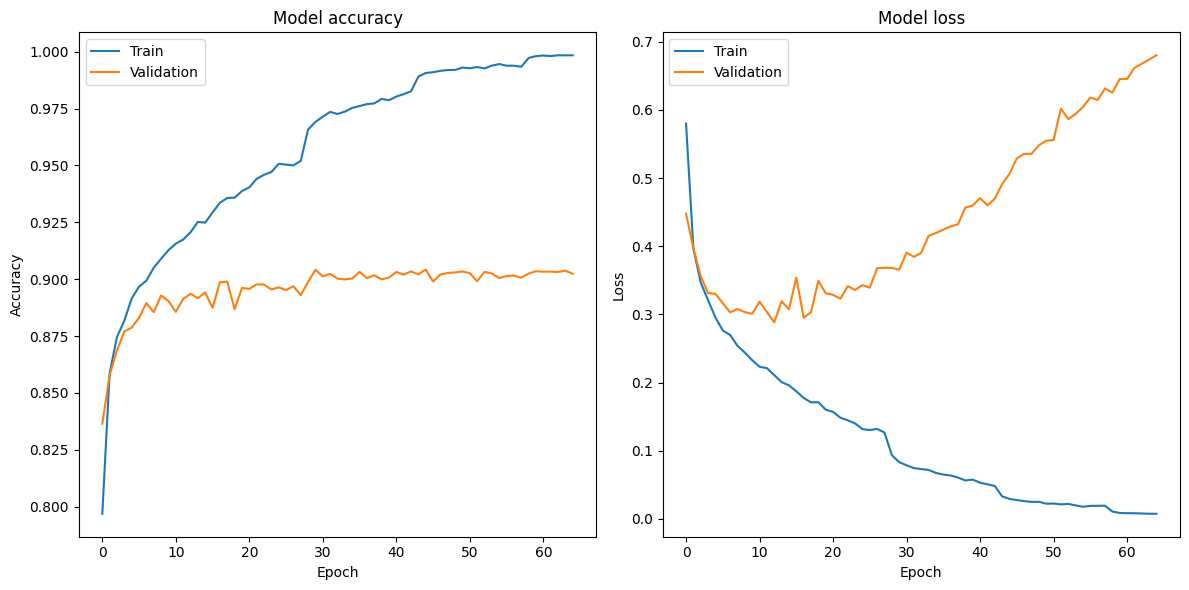

In [34]:
# history를 사용해서 loss, accuracy, val_loss, val_accuracy의 그래프를 출력
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### 10. 모델 평가(predict, evaluate)

In [36]:
# ModelCheckPoint에서 만들어진 best모델을 로딩한후에 evaluate를 사용하여 모델 평가
from keras.models import load_model

best_model = load_model('F-mnist_best.keras')
test_loss, test_accuracy = best_model.evaluate(test_images_2d, test_labels_onehot, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.5583
Test Accuracy: 0.8973
